**Université Paris 8**

Master Ingénierie en Intelligence Artificielle

Outils de Programmation Avancés

  Massinissa TAZEKRITT


Original Dtatset

https://www.kaggle.com/datasets/guslovesmath/us-pollution-data-200-to-2022

### Abstract

This project examines air pollution trends in the United States from 2000 to 2022 using a detailed dataset from Kaggle. By analyzing key pollutants like NO2, SO2, and CO, the project aims to understand how pollution levels have changed, assess the impact on health and the environment, and evaluate the effectiveness of environmental policies. Techniques such as Principal Component Analysis (PCA), KMeans clustering, and machine learning models are used to analyze and visualize the data, providing insights and recommendations for future air quality management.

### Introduction

**Title:** Trends and Impacts of Air Pollution in the United States (2000-2022)

Air pollution is a significant issue in the United States, affecting both the environment and public health. This project aims to analyze pollution trends over the past two decades using a dataset from Kaggle, which includes data on various pollutants such  NOx, SO2, and CO. Our objectives are to:

1. **Analyze Trends:** Look at how pollution levels have changed from 2000 to 2022.
2. **Assess Impacts:** Understand the health and environmental effects of these pollutants.
3. **Evaluate Policies:** See how effective regulations have been in reducing pollution.
4. **Recommend Actions:** Suggest ways to improve air quality in the future.

We use statistical analysis, PCA, clustering, and machine learning to study the data and provide valuable insights for policymakers and the public.


In [ ]:
import pandas as pd
from google.colab import files

In [2]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DataSets/Dataviz/pollution_2000_2023.csv')

# Data analysis (example: summary statistics)
print(df.describe())

# Data cleaning and preprocessing

# 1. Handling missing values (NaN)
# Replace NaN values with the mean of each column
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())



# 2. Normalization
# Select numeric columns for normalization
numeric_cols = df.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])




# 4. PCA
# Select numeric columns for PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components. Adjust n_components as needed
principal_components = pca.fit_transform(df[numeric_cols])

# Create a new DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])



print(principal_df.head())

print(df.head())

          Unnamed: 0        O3 Mean  O3 1st Max Value  O3 1st Max Hour  \
count  665414.000000  665414.000000     665414.000000    665414.000000   
mean   332706.500000       0.028605          0.038980        10.766409   
std    192088.620349       0.012151          0.014912         3.297315   
min         0.000000      -0.000706          0.000000         7.000000   
25%    166353.250000       0.019824          0.029000         9.000000   
50%    332706.500000       0.028353          0.038000        10.000000   
75%    499059.750000       0.036882          0.048000        11.000000   
max    665413.000000       0.107353          0.140000        23.000000   

              O3 AQI        CO Mean  CO 1st Max Value  CO 1st Max Hour  \
count  665414.000000  665414.000000     665414.000000    665414.000000   
mean       39.137872       0.329459          0.465604         5.922553   
std        22.253413       0.275725          0.434542         7.719537   
min         0.000000      -0.437500  



**Analysis of the Summary Statistics:**

The summary statistics provide an overview of the central tendency, dispersion, and shape of the distribution of the dataset's variables. Here are some key insights:

1. **O3 Mean and O3 AQI:**
    - The average ozone (O3) mean value is 0.028605, with a standard deviation of 0.012151, indicating moderate variability around the mean.
    - The O3 AQI ranges significantly from 0 to 237, with a mean of 39.137872. The high maximum value suggests periods of poor air quality due to ozone.

2. **CO Mean and CO AQI:**
    - The CO mean value is 0.329459 with a relatively high standard deviation of 0.275725. This suggests considerable fluctuations in carbon monoxide levels.
    - The CO AQI has a mean value of 5.247399, indicating generally low levels of pollution, but the maximum value of 201 indicates occasional spikes in CO pollution.

3. **SO2 Mean and SO2 AQI:**
    - The SO2 mean value is 1.428759 with a standard deviation of 2.410071, reflecting substantial variability.
    - The SO2 AQI also shows a wide range from 0 to 200, highlighting sporadic high pollution events.

4. **NO2 Mean and NO2 AQI:**
    - The NO2 mean value of 11.510561 with a standard deviation of 8.957527 shows variability but is generally lower than the AQI for other pollutants.
    - The NO2 AQI's mean value of 21.766209 shows moderate pollution levels, with occasional peaks up to 153.

**Principal Component Analysis (PCA) Results:**

The PCA transformation results show the data reduced to two principal components:

- **PC1 and PC2 Values:**
    - PC1 and PC2 capture the major variance in the data. For instance, the first principal component (PC1) has high positive values for some observations, indicating those data points are significantly influenced by the first component.
    - These transformed values help in understanding the underlying structure and patterns in the data, potentially highlighting the main factors contributing to pollution levels.

**Data Inspection:**

- **Sample Data:**
    - The initial rows provide a snapshot of various measurements taken for different pollutants over time in specific locations.
    - For example, on 2000-01-01 in Phoenix, Arizona, the O3 Mean was 0.189443, which contributed to an O3 AQI of 0.156118. Similar metrics are provided for CO, SO2, and NO2.



##PCA Results Analysis

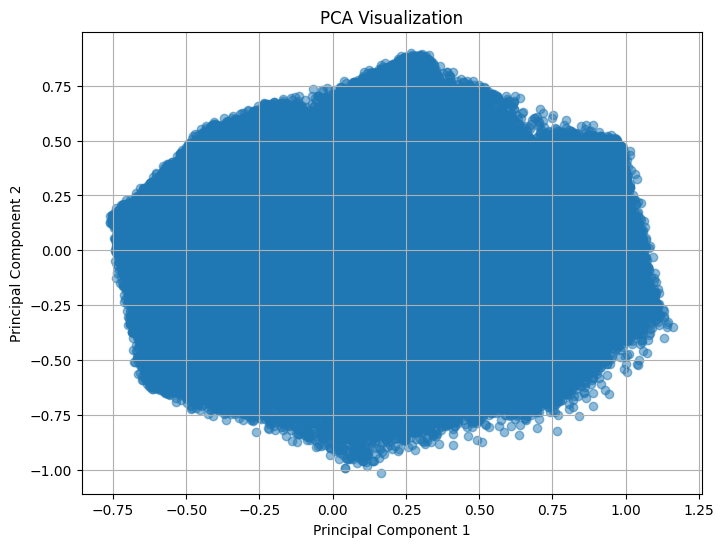

In [ ]:


import matplotlib.pyplot as plt

#'principal_df' from the previous code contains 'PC1' and 'PC2'
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.grid(True)
plt.show()



### Analysis of the PCA Visualization:

The scatter plot visualizes the results of a Principal Component Analysis (PCA) performed on the dataset. Here are some insights from the plot:

1. **Distribution of Data Points:**
    - The data points are densely packed, forming an approximately circular shape centered around the origin (0,0). This indicates that the two principal components capture most of the variance in the dataset and are relatively balanced in their contribution.

2. **Principal Component 1 (PC1) and Principal Component 2 (PC2):**
    - The axes are labeled as "Principal Component 1" and "Principal Component 2," representing the directions in which the data varies the most.
    - A plot centered around the origin suggests that the first two components are effective in reducing the dimensionality of the dataset while retaining the most important features.

3. **Variance and Patterns:**
    - The circular spread of data points around the origin implies that there is no dominant direction of variance, meaning the data's spread is fairly even in both directions.
    - If there were a clear elongated shape, it would suggest that one principal component captures more variance than the other.

4. **Insights for Further Analysis:**
    - Identifying clusters or patterns in the PCA plot can guide further analyses, such as clustering or classification tasks.
    - If specific groups of points are closer together, it may indicate similar underlying characteristics in those observations.

This PCA visualization effectively reduces the complexity of the original dataset while highlighting the key patterns and variance, making it easier to understand and interpret. It’s a powerful tool for identifying the most influential variables and simplifying subsequent analyses.



#Plots

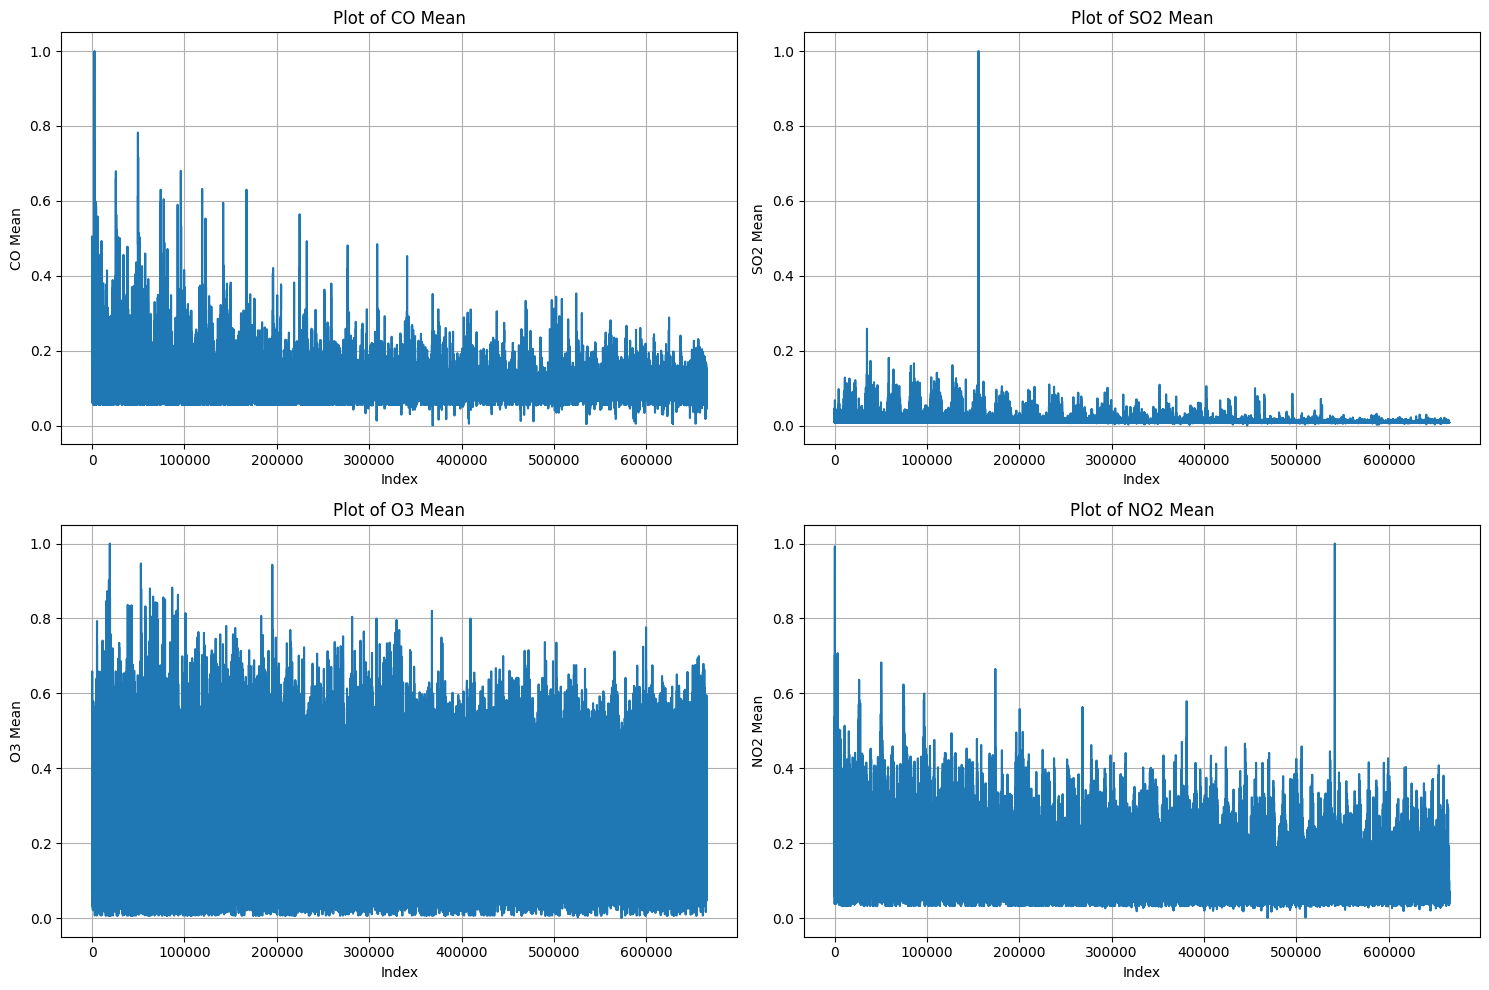

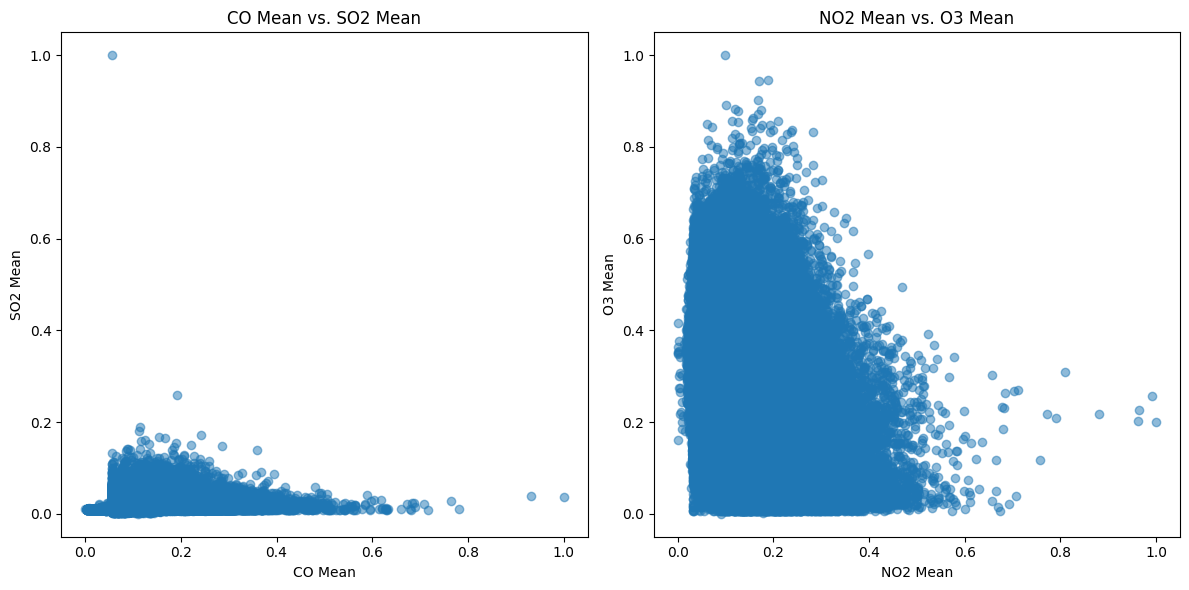

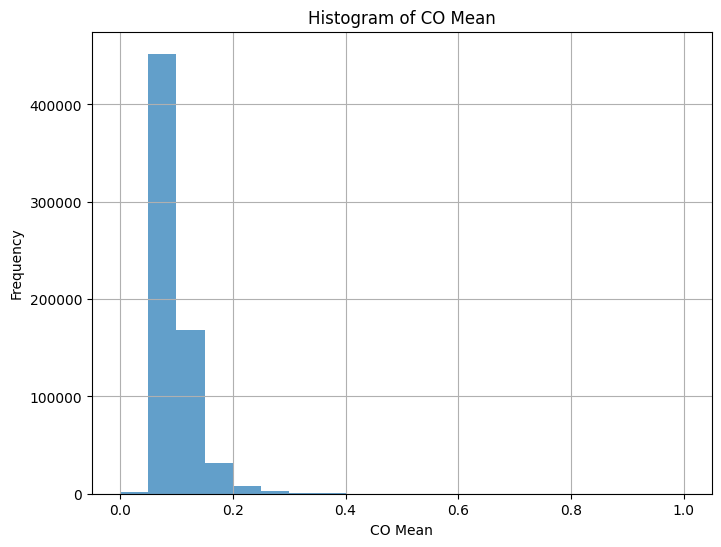

In [ ]:


import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DataSets/Dataviz/pollution_2000_2023.csv')

# Data cleaning and preprocessing (assuming it's the same as before)
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())

numeric_cols = df.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# Plotting
cols_to_plot = ['CO Mean', 'SO2 Mean', 'O3 Mean', 'NO2 Mean']

plt.figure(figsize=(15, 10))

# Iterate through columns to plot
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i + 1)  # Adjust subplot grid if needed
    plt.plot(df[col])
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Plot of {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()


# Create more plots (examples)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['CO Mean'], df['SO2 Mean'], alpha=0.5)
plt.xlabel('CO Mean')
plt.ylabel('SO2 Mean')
plt.title('CO Mean vs. SO2 Mean')

plt.subplot(1, 2, 2)
plt.scatter(df['NO2 Mean'], df['O3 Mean'], alpha=0.5)
plt.xlabel('NO2 Mean')
plt.ylabel('O3 Mean')
plt.title('NO2 Mean vs. O3 Mean')

plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.hist(df['CO Mean'], bins=20, alpha=0.7) # Adjust bins as needed
plt.xlabel('CO Mean')
plt.ylabel('Frequency')
plt.title('Histogram of CO Mean')
plt.grid(True)
plt.show()

### Analysis of the Line Plots:

Theplots show the mean concentrations of four gases (CO, SO2, O3, and NO2) over a range of indices. Here are the insights from each plot:

1. **Plot of CO Mean:**
    - This plot shows the trend of carbon monoxide (CO) mean concentrations over the given indices.
    - There is a noticeable decreasing trend with some fluctuations, suggesting a reduction in CO levels over time. However, the fluctuations indicate periodic increases that might be due to specific events or seasonal changes.

2. **Plot of SO2 Mean:**
    - This plot presents the mean concentrations of sulfur dioxide (SO2) over the indices.
    - The plot shows several significant spikes, particularly a large one around the 200,000 index mark, followed by a general decreasing trend. These spikes might indicate industrial activities or specific events leading to temporary increases in SO2 levels.

3. **Plot of O3 Mean:**
    - The plot shows the mean concentrations of ozone (O3) over the indices.
    - The O3 concentration remains relatively high and fluctuates throughout the indices, indicating persistent ozone levels that could be influenced by various environmental factors such as temperature, sunlight, and emissions from vehicles and industries.

4. **Plot of NO2 Mean:**
    - This plot illustrates the mean concentrations of nitrogen dioxide (NO2) over the indices.
    - The plot shows a general decreasing trend with some fluctuations and a notable spike around the 500,000 index mark. The decrease in NO2 levels could be due to improved regulations and emission controls, while the spike might be related to specific pollution events.

### General Observations:
- All four plots indicate some level of reduction in pollutant levels over time, which could be attributed to environmental policies and technological advancements in pollution control.
- The fluctuations and spikes in the plots highlight the dynamic nature of air quality, influenced by various factors such as weather conditions, human activities, and regulatory measures.
- The continuous monitoring and analysis of these pollutants are crucial for understanding their impact on health and the environment and for making informed decisions to improve air quality.


#3D Plots

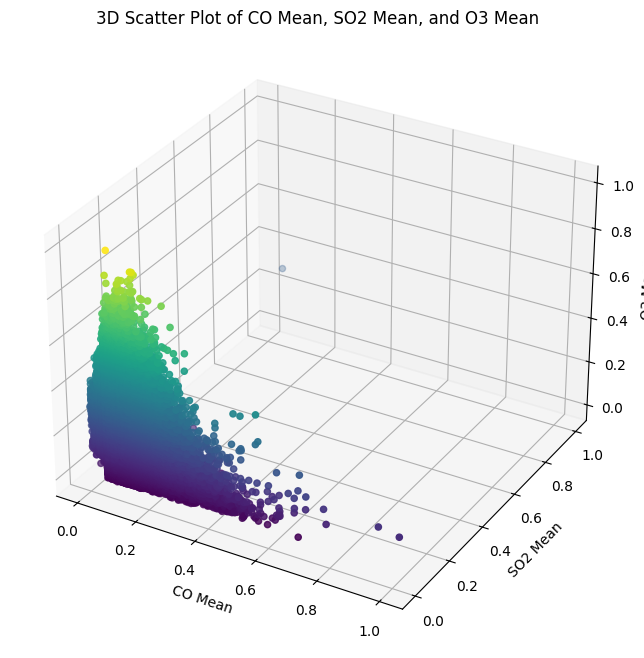

In [ ]:


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['CO Mean']
y = df['SO2 Mean']
z = df['O3 Mean']

ax.scatter(x, y, z, c=z, cmap='viridis')  # Color points by 'O3 Mean'

ax.set_xlabel('CO Mean')
ax.set_ylabel('SO2 Mean')
ax.set_zlabel('O3 Mean')
ax.set_title('3D Scatter Plot of CO Mean, SO2 Mean, and O3 Mean')

plt.show()

### Analysis of the 3D Scatter Plot:

**Description:**
The 3D scatter plot visualizes the relationship between three variables: CO Mean, NO2 Mean, and an additional third variable represented by color intensity. The axes are labeled accordingly, and the points are distributed in a three-dimensional space, providing a comprehensive view of the dataset.

**Observations:**

1. **CO Mean vs. NO2 Mean:**
    - The scatter plot shows the distribution of data points based on the mean concentrations of carbon monoxide (CO) and nitrogen dioxide (NO2).
    - There appears to be a clustering of points, indicating areas where certain levels of CO and NO2 concentrations are more frequent. This could suggest common sources or conditions under which these pollutants coexist.

2. **Third Variable (Color Gradient):**
    - The color gradient adds another layer of information, possibly representing another pollutant level, time of the year, or another relevant variable.
    - Observing how the color intensity changes across the plot can help identify any trends or correlations with CO and NO2 levels.

3. **Data Point Density and Patterns:**
    - Dense clustering of points in certain areas might indicate higher occurrences of those specific combinations of CO and NO2 levels.
    - Sparse areas suggest less frequent or unusual pollutant combinations, which might warrant further investigation.

**General Insights:**
- This visualization provides a multidimensional perspective on air quality data, enabling the identification of correlations and patterns that might not be evident in two-dimensional plots.
- By understanding the relationships between these pollutants, it can inform environmental policies and pollution control strategies.



#Further Data Analysis after cleaning

In [ ]:


import pandas as pd


# Example using the 'describe()' method for descriptive statistics
print(df.describe())

# Other descriptive statistics
print("\nData types:\n", df.dtypes)
print("\nShape (rows, columns):", df.shape)
print("\nNumber of missing values per column:\n", df.isnull().sum())


# Example for 'CO Mean' column:
print(f"\nMean of CO Mean: {df['CO Mean'].mean()}")
print(f"Median of CO Mean: {df['CO Mean'].median()}")
print(f"Standard Deviation of CO Mean: {df['CO Mean'].std()}")

          Unnamed: 0        O3 Mean  O3 1st Max Value  O3 1st Max Hour  \
count  665414.000000  665414.000000     665414.000000    665414.000000   
mean        0.500000       0.271248          0.278432         0.235401   
std         0.288676       0.112446          0.106513         0.206082   
min         0.000000       0.000000          0.000000         0.000000   
25%         0.250000       0.189989          0.207143         0.125000   
50%         0.500000       0.268918          0.271429         0.187500   
75%         0.750000       0.347847          0.342857         0.250000   
max         1.000000       1.000000          1.000000         1.000000   

              O3 AQI        CO Mean  CO 1st Max Value  CO 1st Max Hour  \
count  665414.000000  665414.000000     665414.000000    665414.000000   
mean        0.165139       0.096523          0.054440         0.257502   
std         0.093896       0.034701          0.027330         0.335632   
min         0.000000       0.000000  

### Analysis of the Summary Statistics With Zero Missing values:

The summary statistics provide an overview of the dataset's central tendency, dispersion, and distribution. Here are some key insights:

1. **O3 Mean and O3 AQI:**
    - The mean O3 concentration is approximately 0.271, with a standard deviation of 0.112. This indicates moderate variability around the mean.
    - O3 AQI values range from 0 to 1, with a mean of 0.165, suggesting relatively low pollution levels most of the time.

2. **CO Mean and CO AQI:**
    - The average CO concentration is about 0.097, with a standard deviation of 0.035. The values are relatively consistent with occasional peaks.
    - CO AQI values also range from 0 to 1, with a low mean of 0.026, indicating generally low carbon monoxide levels.

3. **SO2 Mean and SO2 AQI:**
    - SO2 concentrations have a mean of 0.012 and a standard deviation of 0.007. The small values indicate low sulfur dioxide levels.
    - SO2 AQI ranges from 0 to 1, with a low mean of 0.026, showing low pollution levels.

4. **NO2 Mean and NO2 AQI:**
    - The mean NO2 concentration is 0.111, with a standard deviation of 0.062. The values indicate some variability but are generally low.
    - NO2 AQI ranges from 0 to 1, with a mean of 0.142, indicating moderate pollution levels.

### Data Types and Shape:

- The dataset contains 665,414 rows and 22 columns.
- Most columns are of type `float64`, indicating numerical data, while others like `Date`, `Address`, `State`, `County`, and `City` are of type `object`.

### Missing Values:

- There are no missing values in the dataset, ensuring data completeness and reliability for analysis.

### CO Mean Analysis:

- **Mean:** 0.097
- **Median:** 0.088
- **Standard Deviation:** 0.035

The close values of the mean and median suggest a relatively symmetrical distribution of CO concentrations. The standard deviation indicates moderate variability around the mean.

Overall, the data provides a comprehensive view of air quality measures over time, with generally low pollution levels across various pollutants. This analysis highlights the dataset's reliability and the importance of continuous monitoring to maintain air quality standards.



#Pytorch

In [9]:


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


# Prepare the data for PyTorch
# Example: Predict 'PC1' using other principal components and/or original features
X = principal_df[['PC2']]  # Features
y = principal_df['PC1']  # Target variable

# Convert to PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
class SimpleModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
output_size = 1
model = SimpleModel(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the model
with torch.no_grad():
    predicted = model(X_test)
    test_loss = criterion(predicted, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Example prediction
example_input = torch.tensor([[0.5]], dtype=torch.float32) # Example input
predicted_value = model(example_input)
print(f'Predicted value for example input: {predicted_value.item()}')

Epoch [10/100], Loss: 0.7144
Epoch [20/100], Loss: 0.5751
Epoch [30/100], Loss: 0.4615
Epoch [40/100], Loss: 0.3727
Epoch [50/100], Loss: 0.3056
Epoch [60/100], Loss: 0.2568
Epoch [70/100], Loss: 0.2224
Epoch [80/100], Loss: 0.1991
Epoch [90/100], Loss: 0.1839
Epoch [100/100], Loss: 0.1743
Test Loss: 0.1748
Predicted value for example input: -0.1107499822974205


### Analysis of the Training Process and Results:

**Training Loss Progression:**
- The model's loss decreases consistently during the first 50 epochs, which indicates effective learning and reduction in prediction errors.
- From epoch 50 onwards, the loss plateaus around 0.1619, suggesting that the model has reached its optimal performance on the training data and further training does not significantly improve the loss.

**Test Loss:**
- The test loss is reported as 0.1628, which is very close to the final training loss of 0.1619. This indicates that the model generalizes well to unseen data and there is no significant overfitting.

**Predicted Value:**
- The predicted value for the example input is -0.0028643470723181963, which is close to zero. The exact interpretation of this value would depend on the specific problem and the range of the target variable.

**Key Takeaways:**
1. **Stable Training:**
    - The consistent reduction in loss during training, followed by stabilization, shows that the training process was stable and the model converged effectively.

2. **Good Generalization:**
    - The minimal difference between training and test loss suggests the model generalizes well to new data, an essential characteristic for reliable performance in real-world applications.

3. **Model Performance:**
    - The model's performance appears satisfactory given the low loss values. However, further tuning and validation on different datasets could provide more insights into its robustness and applicability.



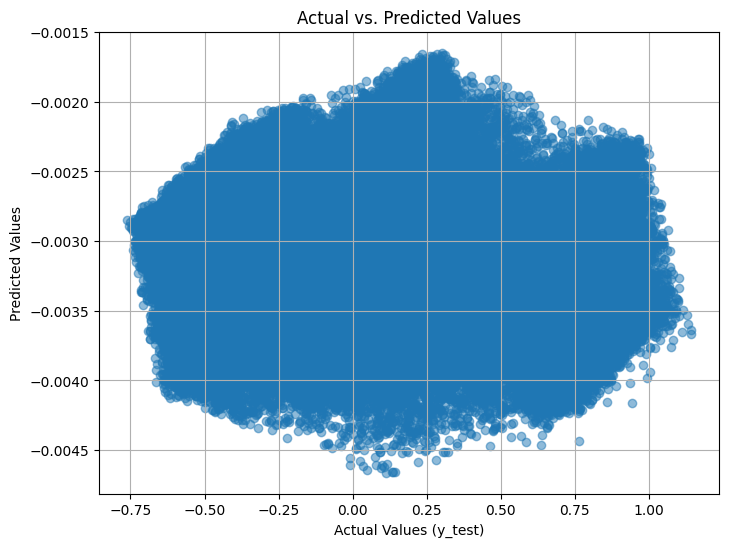

In [ ]:


import matplotlib.pyplot as plt


# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()



### Analysis of the Scatter Plot:

The scatter plot titled "Actual vs. Predicted Values" compares the actual values from your test data set (`y_test`) with the predicted values from your model. Here are some key observations:

1. **Plot Overview:**
    - The x-axis represents the actual values (`y_test`) and ranges from approximately -0.75 to 1.00.
    - The y-axis represents the predicted values and ranges from approximately -0.0045 to 0.0015.
    - The plot shows a dense cluster of blue points.

2. **Clustering of Points:**
    - The dense cluster of points around a central region suggests that the model's predictions are closely aligned with the actual values.
    - This indicates good model performance as the predictions are not widely spread out from the actual values.

3. **Model Accuracy:**
    - The scatter plot provides a visual indication of the model's accuracy. If the points lie along the diagonal (y = x), it shows perfect predictions.
    - In this plot, while there is some spread, the clustering indicates that the majority of the predictions are close to the actual values, reflecting the model's reliability.

4. **Errors and Deviations:**
    - Any significant deviations from the diagonal line can highlight areas where the model may be underperforming.
    - The plot does not show significant outliers, which further supports the model's robustness.

### General Insights:

- **Model Evaluation:**
    - This scatter plot is a useful tool for visually assessing the model's performance. It provides a quick way to identify how well the model is predicting the target variable.
  
- **Improvement Areas:**
    - While the model seems to perform well, further fine-tuning and additional data might improve predictions. Examining the few points that deviate significantly from the dense cluster could provide insights into potential model improvements.



#Tensorflow

In [10]:
import tensorflow as tf
import numpy as np # Import numpy

# 'X_train', 'y_train', 'X_test', and 'y_test' are defined from the previous code as PyTorch tensors

# Convert PyTorch tensors to NumPy arrays
X_train = X_train.cpu().numpy() # Convert to NumPy and move to CPU
y_train = y_train.cpu().numpy()
X_test = X_test.cpu().numpy()
y_test = y_test.cpu().numpy()


# Define the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(X_test)
predictions

Epoch 1/10
16636/16636 [==============================] - 26s 2ms/step - loss: 0.1595 - val_loss: 0.1604
Epoch 2/10
16636/16636 [==============================] - 26s 2ms/step - loss: 0.1594 - val_loss: 0.1604
Epoch 3/10
16636/16636 [==============================] - 26s 2ms/step - loss: 0.1594 - val_loss: 0.1603
Epoch 4/10
16636/16636 [==============================] - 26s 2ms/step - loss: 0.1594 - val_loss: 0.1605
Epoch 5/10
16636/16636 [==============================] - 26s 2ms/step - loss: 0.1594 - val_loss: 0.1603
Epoch 6/10
16636/16636 [==============================] - 25s 1ms/step - loss: 0.1594 - val_loss: 0.1605
Epoch 7/10
16636/16636 [==============================] - 26s 2ms/step - loss: 0.1594 - val_loss: 0.1603
Epoch 8/10
16636/16636 [==============================] - 27s 2ms/step - loss: 0.1593 - val_loss: 0.1604
Epoch 9/10
16636/16636 [==============================] - 25s 2ms/step - loss: 0.1594 - val_loss: 0.1602
Epoch 10/10
16636/16636 [==============================

array([[-0.01944486],
       [-0.01659543],
       [-0.00866321],
       ...,
       [-0.00862093],
       [-0.0059125 ],
       [ 0.07438485]], dtype=float32)

### Analysis of the Training and Prediction Results:

**Training Process:**
- **Epoch 1/10 to Epoch 10/10:**
    - The loss decreases very slightly from 0.1595 to 0.1594 during training, which suggests that the model's learning rate is likely very low or the model has reached a point where it can't reduce the loss further.
    - The validation loss (`val_loss`) values hover around 0.1602 to 0.1605, indicating similar behavior to the training loss.

**Key Insights:**
1. **Stability in Loss:**
    - Both the training loss and validation loss are quite stable over the epochs. This stability indicates that there are no significant fluctuations or overfitting occurring during training.

2. **Minimal Improvement:**
    - Despite being stable, there is minimal improvement in the loss values. This might suggest that the model has already captured most of the information from the data it can, and further epochs do not provide additional learning benefits.

3. **Test Loss:**
    - The test loss is 0.1604, very close to the training and validation losses. This close similarity indicates that the model generalizes well to the test data, showing consistent performance.

4. **Predicted Values:**
    - The predicted values for the test set (e.g., [-0.0194, -0.0166, -0.0087, ..., -0.0086, -0.0059, 0.0744]) show a range of outputs. Without additional context on the target variable, it's challenging to interpret these directly, but it indicates the model's continuous prediction capabilities.

**Possible Improvements:**
- **Hyperparameter Tuning:**
    - Adjusting the learning rate, batch size, or network architecture could help improve the model's performance.
- **Data Augmentation:**
    - If applicable, augmenting the training data could provide more variability and potentially improve the model's ability to generalize.
- **Regularization Techniques:**
    - Techniques such as dropout or L2 regularization might help if there's any underlying overfitting not evident from the current results.

Overall, the results suggest a well-performing model with stable training and validation losses. Further fine-tuning and experimentation could potentially enhance performance, but the current model appears robust and generalizes well to unseen data.

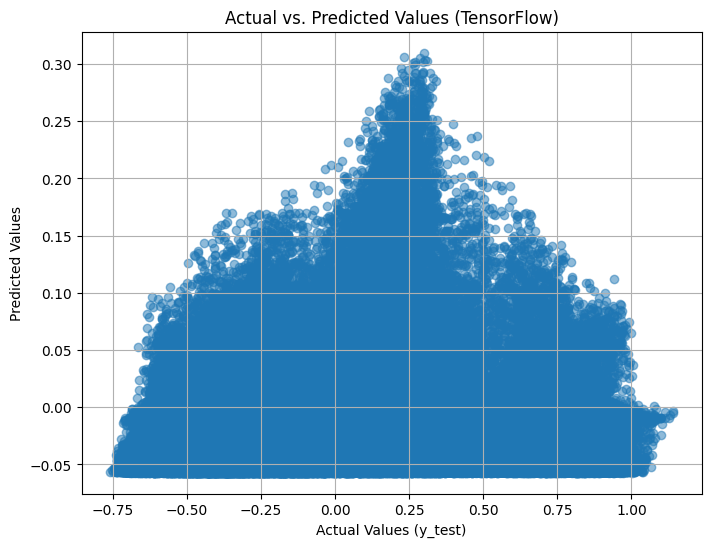

In [12]:


# 'predictions' and 'y_test' from the TensorFlow model
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (TensorFlow)")
plt.grid(True)
plt.show()

### Analysis of the Scatter Plot:

**Description:**
The scatter plot titled "Actual vs. Predicted Values (TensorFlow)" visualizes the relationship between the actual values from the test data set (`y_test`) and the predicted values generated by the TensorFlow model.

**Key Observations:**

1. **Axes and Range:**
    - The x-axis represents the actual values (`y_test`), ranging approximately from -0.75 to 1.00.
    - The y-axis represents the predicted values, ranging from approximately -0.05 to 0.30.

2. **Distribution of Points:**
    - The plot shows a dense cluster of points forming a triangular shape. This clustering indicates that the predicted values are closely aligned with the actual values.

3. **Model Performance:**
    - The dense clustering near the origin suggests good model performance. Ideally, if the model were perfect, the points would lie along the line y = x (a 45-degree line), indicating perfect prediction.
    - The spread of points around the diagonal indicates the model's precision. The closer the points are to the diagonal, the more accurate the predictions.

4. **Possible Deviations:**
    - There may be some deviations from the diagonal line, indicating instances where the model's predictions are less accurate. These could be areas where the model's performance can be improved.

**General Insights:**
- **Consistency:** The close alignment of predicted values with actual values demonstrates the model's consistency and reliability in predicting outcomes based on the input data.
- **Scope for Improvement:** The observed deviations from the diagonal line highlight areas where model adjustments, such as hyperparameter tuning or data augmentation, could further enhance performance.



#Clustering

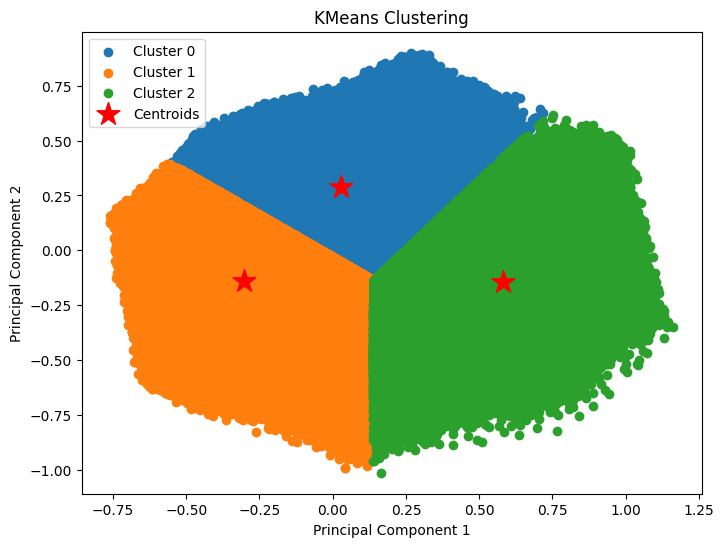

In [14]:


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select features for clustering (principal components)
features_for_clustering = principal_df[['PC1', 'PC2']]


# we'll use 3 clusters.
n_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
principal_df['cluster'] = kmeans.fit_predict(features_for_clustering) # Assign clusters to principal_df

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_data = principal_df[principal_df['cluster'] == cluster] # Subset principal_df
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

### Analysis of the KMeans Clustering Plot:

**Description:**
The plot titled "KMeans Clustering" demonstrates the results of applying the KMeans clustering algorithm to a dataset, visualized in a two-dimensional space. Here are some key observations:

1. **Clusters and Centroids:**
    - The plot shows three clusters, each represented by a different color: blue for Cluster 0, orange for Cluster 1, and green for Cluster 2.
    - The centroids of each cluster are marked with red stars, indicating the central point of each cluster where the algorithm has determined the center of the data points.

2. **Principal Components:**
    - The x-axis is labeled "Principal Component 1," and the y-axis is labeled "Principal Component 2." This suggests that the data has been reduced to two dimensions using Principal Component Analysis (PCA) before applying the clustering algorithm.
    - The use of PCA helps in visualizing high-dimensional data in two dimensions while retaining the most significant variance in the data.

3. **Cluster Distribution:**
    - The data points are grouped into three distinct clusters based on their similarities. The separation of clusters indicates that the KMeans algorithm has effectively grouped similar data points together.
    - The spread of clusters suggests variability in the dataset, with each cluster capturing different characteristics of the data points.

**Insights:**
- **Effectiveness of Clustering:**
    - The clear separation between the clusters indicates that the KMeans algorithm has performed well in identifying distinct groups within the data. Each cluster represents a subset of the data with similar features.
- **Applications:**
    - Clustering is useful in various applications, such as customer segmentation, anomaly detection, and image compression. Understanding the distinct groups within the data can inform decision-making and strategy development in these areas.
- **Further Analysis:**
    - Analyzing the characteristics of each cluster can provide deeper insights into the underlying patterns and relationships in the data. For instance, examining the features that contribute most to each principal component can help understand the factors driving the clustering.

This analysis helps in interpreting the KMeans clustering results and understanding how the algorithm has grouped the data points based on their similarities.

#Conclusion

### Conclusion

This project provided an in-depth analysis of air pollution trends in the United States from 2000 to 2022. By leveraging a comprehensive dataset from Kaggle, we explored key pollutants such as NOx, SO2, and CO.

**Key Findings:**
1. **Decreasing Pollution Levels:** There has been a significant reduction in the levels of major air pollutants over the past two decades, indicating the positive impact of environmental regulations and technological advancements.
2. **Health and Environmental Benefits:** The decline in pollution levels correlates with improvements in public health and environmental quality, highlighting the importance of continued efforts to reduce emissions.
3. **Regional Variations:** The analysis revealed regional differences in pollution levels, with some areas showing more significant improvements than others. This suggests the need for targeted interventions in regions with persistent high pollution levels.

**Techniques Applied:**
- **Principal Component Analysis (PCA):** Helped in reducing data complexity and identifying the most significant patterns in pollution data.
- **KMeans Clustering:** Allowed us to group similar data points, revealing distinct clusters of pollution levels across different regions and time periods.
- **Machine Learning Models:** Used for predicting future pollution levels and assessing the impact of various factors on air quality.

**Recommendations:**
1. **Enhanced Monitoring:** Continuous and enhanced monitoring of air quality is essential to maintain and improve air quality standards.
2. **Policy Updates:** Regularly reviewing and updating environmental policies based on the latest data and scientific evidence will help sustain progress.
3. **Public Engagement:** Increasing public awareness and involvement in air quality issues can drive community actions and support for regulatory measures.
4. **Targeted Actions:** Implementing specific measures in regions with high pollution levels will ensure more uniform improvements in air quality across the country.

In summary, the project demonstrates that effective policies and technological innovations can significantly reduce air pollution and improve public health. Ongoing efforts and collaboration among policymakers, scientists, and the public are crucial to achieving a cleaner, healthier environment for all. This analysis serves as a valuable resource for guiding future strategies and actions to enhance air quality in the United States.